<a href="https://colab.research.google.com/github/khushii812-2/Data-Science-Handouts-/blob/main/4.%20Phylogenetic_tree_of_hsp70.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopython ete3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 33.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ete3: filename=ete3-3.1.3-py3-none-any.whl size=2273786 sha256=b0fa6c9a0a94819a304cddaa89e4f4caea01bcd76e3a2583903cbeb635b65b8b
  Stored in directory: /root/.cache/pip/wheels/dd/a8/60/0a29caa9f8ceb7316704be63c1578ab13c36668abb646366ac
Successfully built ete3


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving hsp70_sequences.fasta to hsp70_sequences (1).fasta


In [ ]:
!sudo apt-get install muscle
!muscle -in hsp70_sequences.fasta -out aligned_hsp70.fasta


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  muscle
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 244 kB of archives.
After this operation, 709 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 muscle amd64 1:3.8.1551-2build1 [244 kB]
Fetched 244 kB in 0s (992 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package muscle.
(Reading database ... 126125 files and directories cur

In [ ]:
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo

alignment = AlignIO.read("aligned_hsp70.fasta", "fasta")
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(alignment)

constructor = DistanceTreeConstructor()
tree = constructor.nj(dm)

# Save in Newick format
Phylo.write(tree, "hsp70_tree.nwk", "newick")


1

In [ ]:
from google.colab import files

# Download the generated Newick file
files.download("hsp70_tree.nwk")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving hsp70_tree.nwk to hsp70_tree (1).nwk


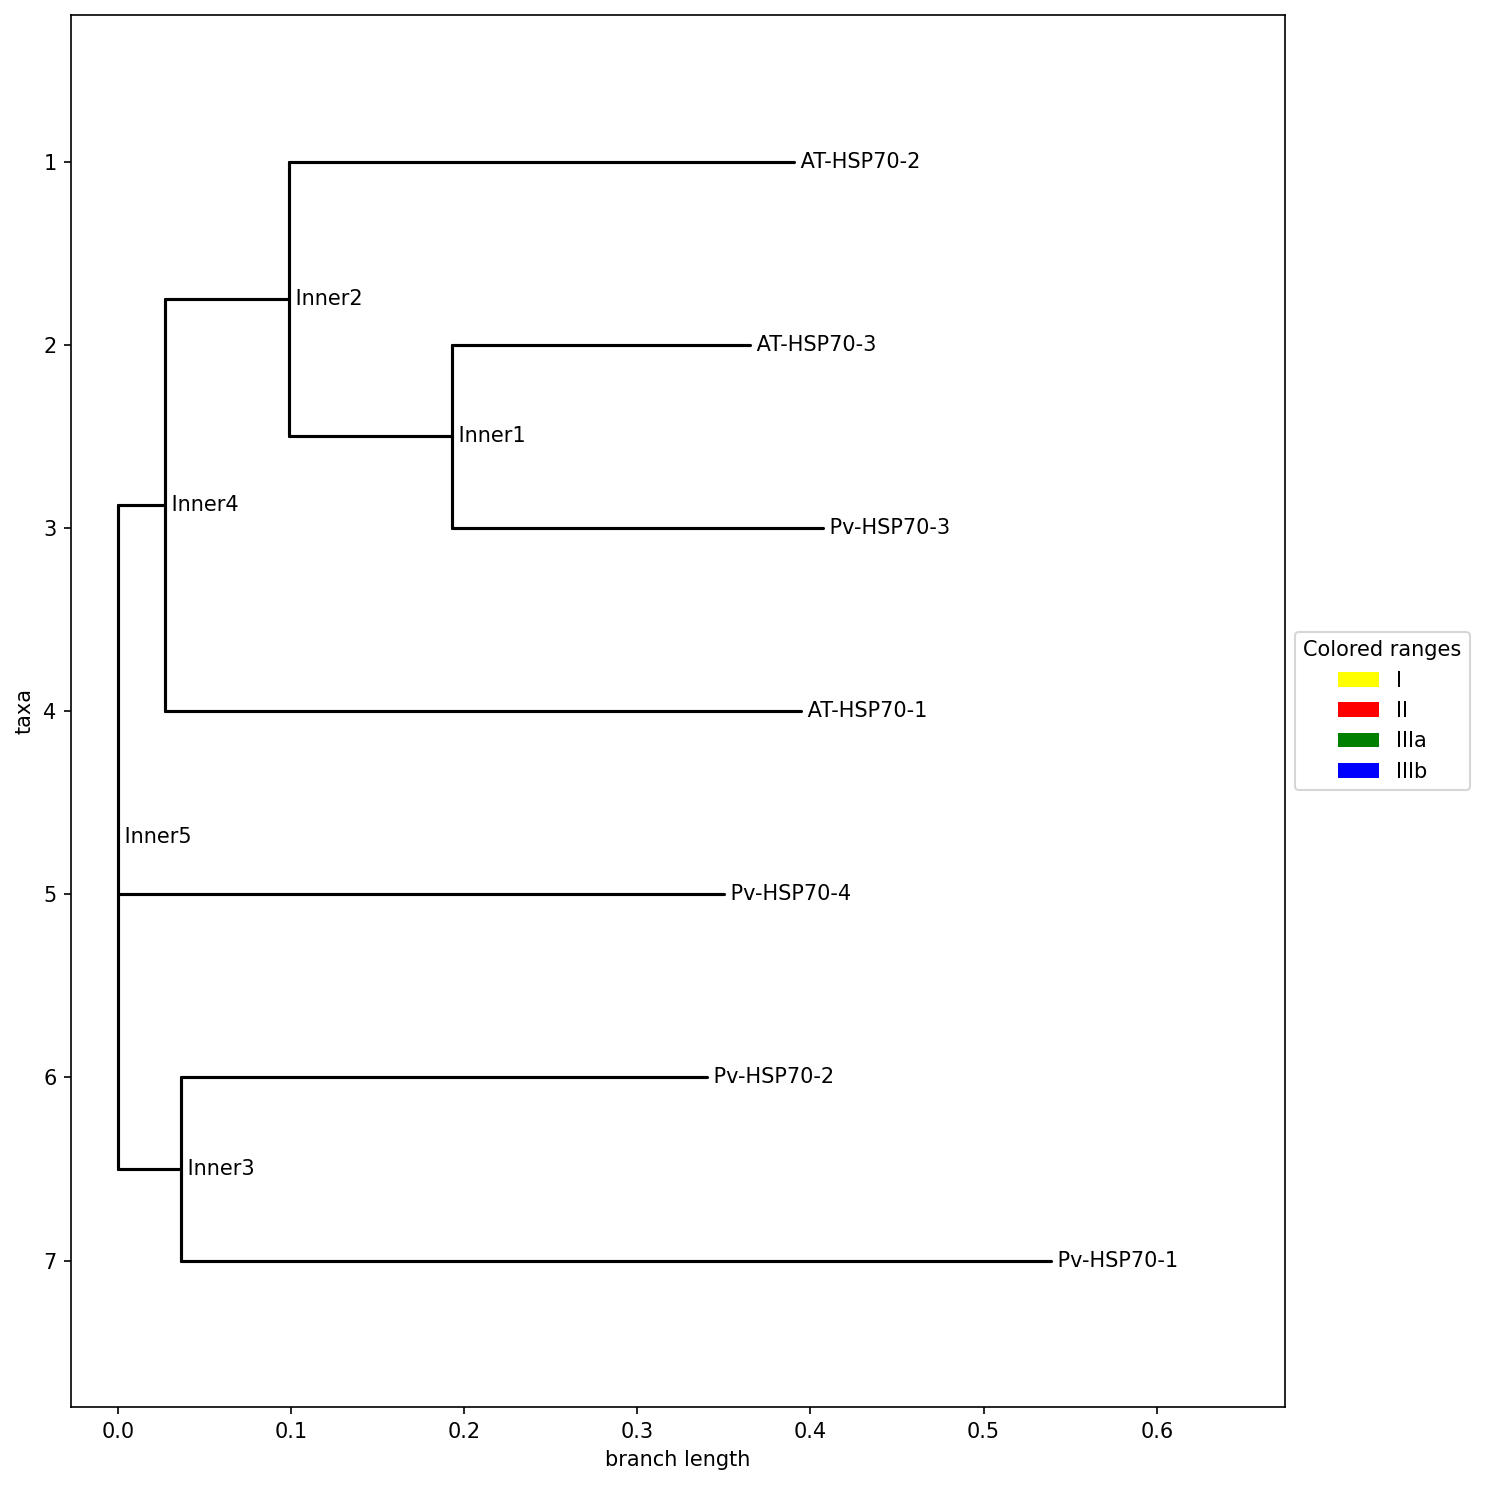

In [ ]:
import matplotlib.pyplot as plt
from Bio import Phylo
from matplotlib.patches import Patch

# Load the tree
tree = Phylo.read("hsp70_tree.nwk", "newick")

# Set up figure
fig = plt.figure(figsize=(10, 10), dpi=150)
ax = fig.add_subplot(1, 1, 1)

# Draw the tree (will be rectangular without the circular option)
Phylo.draw(tree, axes=ax, do_show=False, branch_labels=None, label_func=lambda x: x.name, show_confidence=False)

# Optional: Color the tip labels based on clade groupings
group_colors = {
    'I': 'yellow',
    'II': 'red',
    'IIIa': 'green',
    'IIIb': 'blue'
}

# Define groups manually (you can automate this based on your dataset)
group_I = ['Pv-HSP70-12', 'Pv-HSP70-13', 'AT5G49910', 'AT4G24180']
group_II = ['AT4G32200', 'Pv-HSP70-11', 'AT5G05990']
group_IIIa = ['Pv-HSP70-2', 'AT2G32120', 'AT3G12580']
group_IIIb = ['Pv-HSP70-14', 'Pv-HSP70-1', 'AT5G02480', 'Pv-HSP70-5']

# Combine all into a dictionary
group_dict = {name: 'I' for name in group_I}
group_dict.update({name: 'II' for name in group_II})
group_dict.update({name: 'IIIa' for name in group_IIIa})
group_dict.update({name: 'IIIb' for name in group_IIIb})

# Color labels (This manual labeling might need adjustment based on Phylo.draw output)
# Note: Phylo.draw also draws labels. The manual ax.text calls might overlap or be misplaced.
# You might need to disable Phylo.draw's labels and only use manual text, or adjust positions.
# For simplicity, I'll keep the manual labeling code for now, but be aware of potential overlap.
for clade in tree.get_terminals():
    # Getting coordinates after Phylo.draw might be complex, using branch_length as a placeholder
    # A more robust approach would involve iterating through axes.get_children() to find label artists
    x, y = clade.branch_length or 0, 0 # These coordinates are likely incorrect for text placement after Phylo.draw
    # Finding the correct text object added by Phylo.draw to modify its color is better
    # This requires inspecting the artists added to the axes by Phylo.draw

    # A simpler approach for coloring existing labels: iterate through axes text objects
    for text_obj in ax.texts:
        if text_obj.get_text() == clade.name:
            color = group_colors.get(group_dict.get(clade.name, ''), 'black')
            text_obj.set_color(color)
            # Remove the break if multiple text objects could match, but usually there's one per label
            break


# Add Legend
legend_elements = [Patch(facecolor=col, label=grp) for grp, col in group_colors.items()]
ax.legend(handles=legend_elements, title='Colored ranges', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()